In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
Dir='C:/Users/jawad/Music/sl/train'
Cate=['0','1','2','3','4','5','6','7','8','9']

In [3]:
img_size=224
data=[]
for categ in Cate:
    folder=os.path.join(Dir,categ)
    label=Cate.index(categ)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])

In [4]:
len(data)

1712

In [5]:
import random

In [6]:
random.shuffle(data)

In [7]:
data[8]

[array([[[122, 127, 130],
         [122, 127, 130],
         [122, 128, 130],
         ...,
         [109, 112, 116],
         [105, 108, 112],
         [104, 107, 111]],
 
        [[122, 127, 130],
         [122, 127, 130],
         [123, 128, 131],
         ...,
         [109, 112, 117],
         [106, 109, 113],
         [105, 108, 112]],
 
        [[123, 127, 130],
         [123, 128, 131],
         [123, 128, 131],
         ...,
         [112, 114, 118],
         [108, 111, 115],
         [107, 110, 114]],
 
        ...,
 
        [[123, 128, 131],
         [123, 128, 131],
         [124, 130, 132],
         ...,
         [113, 116, 120],
         [113, 116, 120],
         [112, 115, 119]],
 
        [[123, 128, 131],
         [123, 128, 131],
         [124, 129, 132],
         ...,
         [113, 116, 120],
         [112, 115, 119],
         [112, 115, 119]],
 
        [[123, 128, 131],
         [123, 128, 131],
         [124, 129, 132],
         ...,
         [112, 116, 119],
  

In [8]:
train_images=[]
train_labels=[]
for x,y in data:
    train_images.append(x)
    train_labels.append(y)

In [9]:
train_images=np.array(train_images)
train_labels=np.array(train_labels)

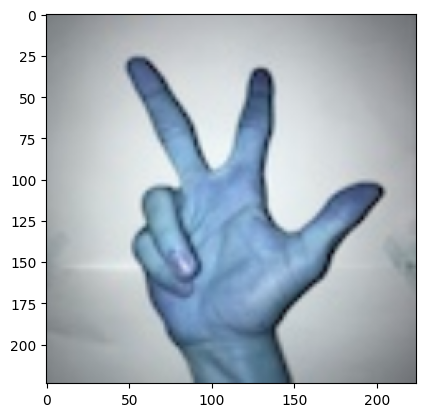

In [10]:
plt.imshow(train_images[8])

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image

In [12]:
mobile=tf.keras.applications.mobilenet.MobileNet()

In [13]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [14]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

In [31]:
from tensorflow.keras import Model
x = GlobalAveragePooling2D()(mobile.layers[-10].output)
output = Dense(10, activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=output)
for layer in model.layers[:-15]:
    layer.trainable=False
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)

In [34]:
len(train_labels)

1712

In [35]:
train_labels = np.argmax(train_labels, axis=1)
train_labels = train_labels.reshape(-1, 1)

In [36]:
len(train_labels)

1712

In [37]:
model.fit(x=train_images,y=train_labels,epochs=10,verbose=2)

Epoch 1/10
54/54 - 4s - loss: 0.2114 - accuracy: 0.9410 - 4s/epoch - 74ms/step
Epoch 2/10
54/54 - 3s - loss: 0.0079 - accuracy: 0.9994 - 3s/epoch - 53ms/step
Epoch 3/10
54/54 - 3s - loss: 0.0036 - accuracy: 1.0000 - 3s/epoch - 54ms/step
Epoch 4/10
54/54 - 3s - loss: 0.0017 - accuracy: 1.0000 - 3s/epoch - 53ms/step
Epoch 5/10
54/54 - 3s - loss: 0.0013 - accuracy: 1.0000 - 3s/epoch - 54ms/step
Epoch 6/10
54/54 - 3s - loss: 0.0012 - accuracy: 1.0000 - 3s/epoch - 54ms/step
Epoch 7/10
54/54 - 3s - loss: 7.7685e-04 - accuracy: 1.0000 - 3s/epoch - 53ms/step
Epoch 8/10
54/54 - 3s - loss: 6.1373e-04 - accuracy: 1.0000 - 3s/epoch - 53ms/step
Epoch 9/10
54/54 - 3s - loss: 6.9524e-04 - accuracy: 1.0000 - 3s/epoch - 53ms/step
Epoch 10/10
54/54 - 3s - loss: 5.7278e-04 - accuracy: 1.0000 - 3s/epoch - 53ms/step


In [38]:
testDir='C:/Users/jawad/Music/sl/test'
img_size=224
testdata=[]
for categ in Cate:
    folder=os.path.join(testDir,categ)
    label=Cate.index(categ)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        testdata.append([img_arr,label])

In [39]:
len(testdata)

50

In [40]:
test_images=[]
test_labels=[]
for x,y in testdata:
    test_images.append(x)
    test_labels.append(y)

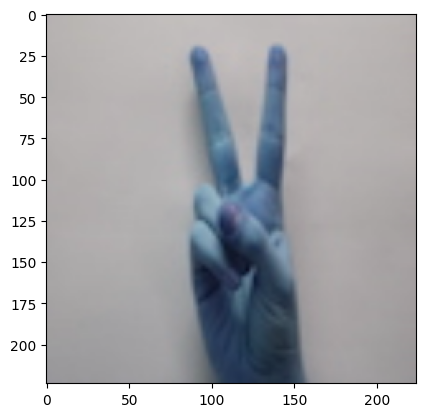

In [41]:
test_images=np.array(test_images)
test_labels=np.array(test_labels)
plt.imshow(test_images[10])

Pick a number: 10
1/1 [==============================] - 0s 346ms/step
Predicated 2
Real 2


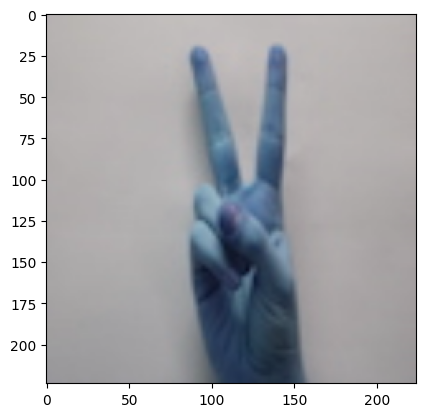

In [42]:
num = int(input("Pick a number: "))
prediction = model.predict(np.array([test_images[num]]))
predicted_class = Cate[np.argmax(prediction)]
print("Predicated "+predicted_class)
print("Real "+Cate[int(test_labels[num])])
plt.imshow(test_images[num])


Pick a number: 20
1/1 [==============================] - 0s 19ms/step
Predicated 4
Real 4


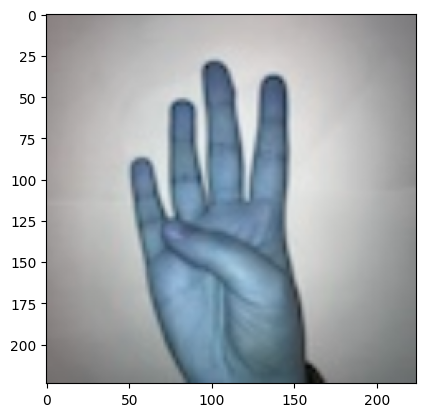

In [43]:
num = int(input("Pick a number: "))
prediction = model.predict(np.array([test_images[num]]))
predicted_class = Cate[np.argmax(prediction)]
print("Predicated "+predicted_class)
print("Real "+Cate[int(test_labels[num])])
plt.imshow(test_images[num])

In [44]:
prediction=[]
for img in test_images:
    p = model.predict(np.array([img]))
    prediction.append(p)

1/1 [==============================] - 0s 17ms/step


In [45]:
len(prediction)

50

In [46]:
predicted_class = []
for pp in prediction:
    c=[np.argmax(pp)]
    predicted_class.append(c)

In [47]:
fail=[]
for i in range(50):
    if predicted_class[i]!=test_labels[i]:
                       fail.append(i)

In [48]:
len(fail)

0